## RDBMS IA2 Implementation
<b>Name:</b> Piyush Sharma    
<b>Roll no.</b> 1911104    
<b>Batch:</b> B3

### Dataset used from kaggle
Mental Health and Suicide Rates<br>
Suicide Rates of age groups in different countries along with Health Facility

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds1 = pd.read_csv("Crude_suicide_rates.csv")
ds2 = pd.read_csv("Age-standardized_suicide_rates.csv")
ds3 = pd.read_csv("Human_Resources.csv")
ds4 = pd.read_csv("Facilities.csv")

Suicide rates(year 2016) per 100000 population in different age range in India

In [3]:
ds1.loc[(ds1.Country == 'India')]

,Country,Sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
225,India,Both sexes,24.5,21.9,17.5,16.8,17.7,22.9,30.3,11.2
226,India,Male,37.7,25.3,21.7,22.5,24.2,29.4,27.8,7.8
227,India,Female,13.6,18.9,13.3,10.9,10.9,15.8,33.1,15.0


Suicide rate distribution for various age groups

Suicide rate for different age groups
Country            India
Sex           Both sexes
 80_above           24.5
 70to79             21.9
 60to69             17.5
 50to59             16.8
 40to49             17.7
 30to39             22.9
 20to29             30.3
 10to19             11.2
Name: 225, dtype: object


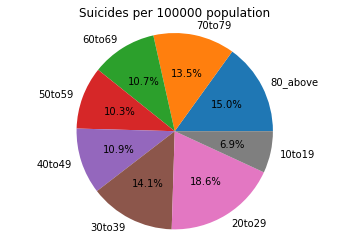

In [4]:
my_data = ds1.iloc[225]
print('Suicide rate for different age groups')
print(my_data)
my_labels = ['80_above', '70to79', '60to69', '50to59', '40to49', '30to39', '20to29', '10to19']
plt.pie(my_data[2:], labels=my_labels, autopct='%1.1f%%')
plt.title('Suicides per 100000 population')
plt.axis('equal')
plt.show()

<b>Analysis:</b> For year 2016 maximum suicides are from 20 to 29 years age group

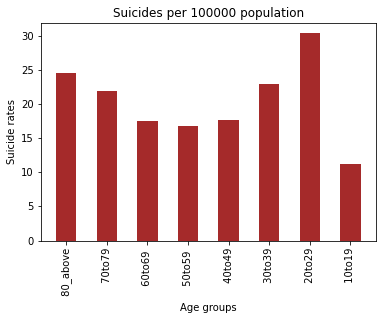

In [5]:
values = list(ds1.iloc[225])[2:]
labels = list(ds1.columns)[2:]
plt.bar(labels, values, color = 'brown', width = 0.5)
plt.xlabel("Age groups")
plt.xticks(rotation = 90)
plt.ylabel("Suicide rates")
plt.title("Suicides per 100000 population")
plt.show()

<b>Bar graph showing suicide rates for various age groups</b>

### Suicide rates for year 2016, 2015, 2010, 2000 in India

Graph for suicide rates in Male


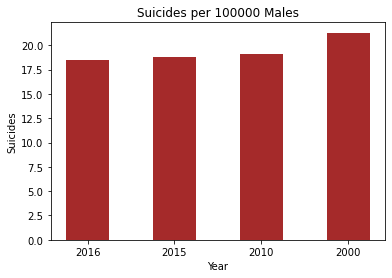

Graph for suicide rates in Female


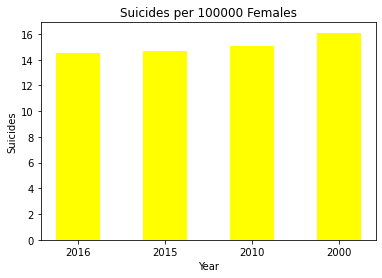

Graph for suicide rates in Both Sexes


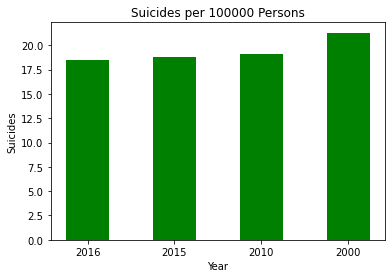

In [6]:
#suicide rates for different years in India
male_ind = ds2.index[(ds2.Country == 'India') & (ds2.Sex == ' Male')].tolist()
female_ind = ds2.index[(ds2.Country == 'India') & (ds2.Sex == ' Female')].tolist()
both_ind = ds2.index[(ds2.Country == 'India') & (ds2.Sex == ' Both sexes')].tolist()

male_value = list(ds2.iloc[male_ind[0]])[2:]
female_value = list(ds2.iloc[female_ind[0]])[2:]
both_value = list(ds2.iloc[both_ind[0]])[2:]

labels = list(ds2.columns)[2:]

print('Graph for suicide rates in Male')
plt.bar(labels, male_value, color = 'brown', width = 0.5)
plt.xlabel("Year")
plt.ylabel("Suicides")
plt.title("Suicides per 100000 Males")
plt.show()

print('Graph for suicide rates in Female')
plt.bar(labels, female_value, color = 'yellow', width = 0.5)
plt.xlabel("Year")
plt.ylabel("Suicides")
plt.title("Suicides per 100000 Females")
plt.show()

print('Graph for suicide rates in Both Sexes')
plt.bar(labels, male_value, color = 'green', width = 0.5)
plt.xlabel("Year")
plt.ylabel("Suicides")
plt.title("Suicides per 100000 Persons")
plt.show()

<b>Analysis:</b> Suicide rates are decreasing from year 2000 to 2016 for both Males and Females in India

### Suicide rates comparison for India and some other countries(for 2016)

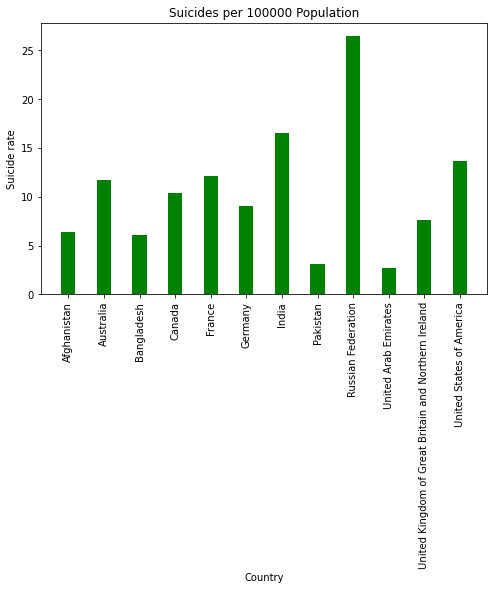

In [7]:
#suicide rates of some countries in year 2016
country_lst = ['Afghanistan', 'Australia', 'Bangladesh', 'Canada', 
               'France', 'Germany', 'India', 'Pakistan', 'Russian Federation', 
               'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 
               'United States of America']
suicide_rates_2016 = ds2[['Country', '2016']].loc[(ds2.Sex == ' Both sexes') & ds2.Country.isin(country_lst)]
rate_data = list(suicide_rates_2016['2016'])
country_labels = list(suicide_rates_2016['Country'])
fig = plt.figure(figsize = (8, 5))
plt.bar(country_labels, rate_data, color = 'green', width = 0.4)
plt.xlabel("Country")
plt.xticks(rotation = 90)
plt.ylabel("Suicide rate")
plt.title("Suicides per 100000 Population")
plt.show()

Country with highest suicide rates for males in year 2016 per 100000 population

In [8]:
highest_rate_male = ds2[['Country', 'Sex', '2016']][(ds2['Sex'] == ' Male')]
highest_rate_male[['Country', 'Sex', '2016']][highest_rate_male['2016'] == highest_rate_male['2016'].max()]

,Country,Sex,2016
406,Russian Federation,Male,48.3


Country with highest suicide rates for females in year 2016 per 100000 population

In [9]:
highest_rate_female = ds2[['Country', 'Sex', '2016']][(ds2['Sex'] == ' Female')]
highest_rate_female[['Country', 'Sex', '2016']][highest_rate_female['2016'] == highest_rate_female['2016'].max()]

,Country,Sex,2016
281,Lesotho,Female,32.6


Country with highest suicide rates in year 2016 per 100000 population

In [10]:
highest_rate = ds2[['Country', 'Sex', '2016']][(ds2['Sex'] == ' Both sexes')]
highest_rate[['Country', 'Sex', '2016']][highest_rate['2016'] == highest_rate['2016'].max()]

,Country,Sex,2016
210,Guyana,Both sexes,30.2


Average suicide rates for year 2016, 2015, 2010, 2000

In [11]:
ds2.mean(axis = 0)

2016     9.792532
2015     9.925683
2010    10.544991
2000    12.164117
dtype: float64

<b>Data cleansing</b>

In [12]:
ds3.replace(np.nan, "Data not avl", inplace = True)
ds3.head()

,Country,Year,Psychiatrists,Nurses,Social_workers,Psychologists
0,Afghanistan,2016,0.231,0.098,Data not avl,0.296
1,Albania,2016,1.471,6.876,1.06,1.231
2,Angola,2016,0.057,0.66,0.022,0.179
3,Antigua and Barbuda,2016,1.001,7.005,4.003,Data not avl
4,Argentina,2016,21.705,Data not avl,Data not avl,222.572


In [13]:
ds4.replace(np.nan, "Data not avl", inplace = True)
ds4.head()

,Country,Year,Mental_hospitals,health_units,outpatient_facilities,day_treatment,residential_facilities
0,Afghanistan,2016,0.003,0.012,0.006,Data not avl,Data not avl
1,Albania,2016,0.068,0.068,0.41,Data not avl,0.445
2,Algeria,2016,0.048,0.068,0.048,Data not avl,Data not avl
3,Angola,2016,0.011,Data not avl,Data not avl,Data not avl,0.014
4,Antigua and Barbuda,2016,1.001,Data not avl,Data not avl,Data not avl,Data not avl


#### Mental health related Human Resources in India per 100000 people

In [14]:
ds3.loc[ds3.Country == 'India']

,Country,Year,Psychiatrists,Nurses,Social_workers,Psychologists
45,India,2016,0.292,0.796,0.065,0.069


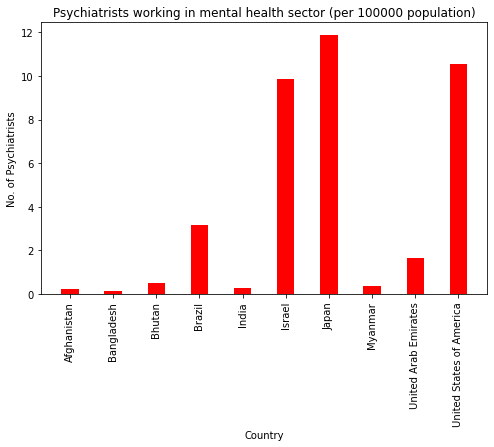

In [15]:
new_country_lst = ['India', 'Bangladesh', 'Afghanistan', 'Bhutan', 
                   'Brazil', 'Israel', 'Japan', 'Myanmar', 'United Arab Emirates', 
                   'United States of America']
psychiatrists = ds3[['Country', 'Psychiatrists']].loc[(ds3.Country.isin(new_country_lst))]
country_labels = list(psychiatrists['Country'])
psy_data = list(psychiatrists['Psychiatrists'])
fig = plt.figure(figsize = (8, 5))
plt.bar(country_labels, psy_data, color = 'red', width = 0.4)
plt.xlabel("Country")
plt.xticks(rotation = 90)
plt.ylabel("No. of Psychiatrists")
plt.title("Psychiatrists working in mental health sector (per 100000 population)")
plt.show()

Psychiatrists working in mental health sector (per 100000 population) among various countries <br>
<b>Analysis:</b> Japan has most Psychiatrists working in mental health sector than other considered countries

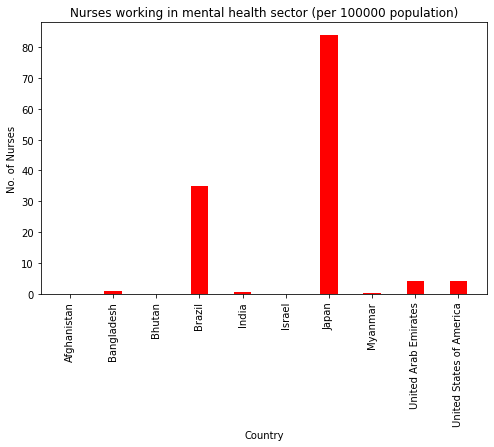

In [16]:
nurses = ds3[['Country', 'Nurses']].loc[(ds3.Country.isin(new_country_lst))]
nur_data = list(nurses['Nurses'])
for data in nur_data:
    if data == 'Data not avl':
        i = nur_data.index(data)
        nur_data[i] = 0
        
fig = plt.figure(figsize = (8, 5))
plt.bar(country_labels, nur_data, color = 'red', width = 0.4)
plt.xlabel("Country")
plt.xticks(rotation = 90)
plt.ylabel("No. of Nurses")
plt.title("Nurses working in mental health sector (per 100000 population)")
plt.show()

Nurses working in mental health sector (per 100000 population)<br>
<b>Analysis:</b> Japan has most Nurses working in mental health sector than other considered countries

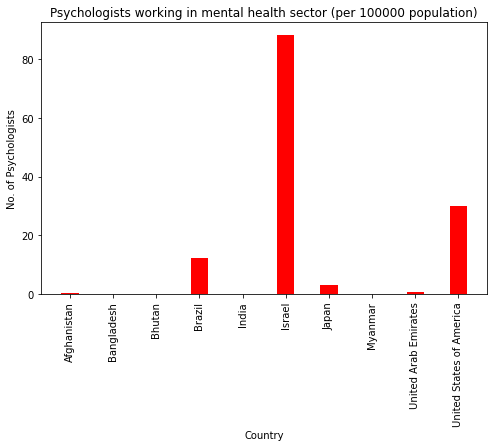

In [17]:
psychologists  = ds3[['Country', 'Psychologists']].loc[(ds3.Country.isin(new_country_lst))]
psychologists_data = list(psychologists['Psychologists'])
for data in psychologists_data:
    if data == 'Data not avl':
        i = psychologists_data.index(data)
        psychologists_data[i] = 0
        
fig = plt.figure(figsize = (8, 5))
plt.bar(country_labels, psychologists_data, color = 'red', width = 0.4)
plt.xlabel("Country")
plt.xticks(rotation = 90)
plt.ylabel("No. of Psychologists")
plt.title("Psychologists working in mental health sector (per 100000 population)")
plt.show()

Psychologists working in mental health sector (per 100000 population)<br>
<b>Analysis:</b> Israel has most Psychologists working in mental health sector than other considered countries

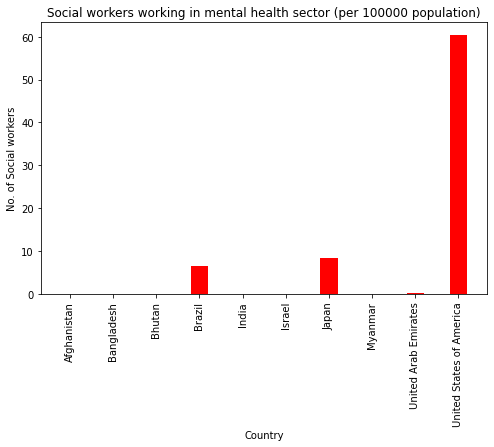

In [18]:
social_workers = ds3[['Country', 'Social_workers']].loc[(ds3.Country.isin(new_country_lst))]
social_workers_data = list(social_workers['Social_workers'])
for data in social_workers_data:
    if data == 'Data not avl':
        i = social_workers_data.index(data)
        social_workers_data[i] = 0
        
fig = plt.figure(figsize = (8, 5))
plt.bar(country_labels, social_workers_data, color = 'red', width = 0.4)
plt.xlabel("Country")
plt.xticks(rotation = 90)
plt.ylabel("No. of Social workers")
plt.title("Social workers working in mental health sector (per 100000 population)")
plt.show()

Social workers working in mental health sector (per 100000 population)<br>
<b>Analysis:</b> United States of America has most Social workers working in mental health sector than other considered countries

### Mental health related facilities in India per 100000 population

In [19]:
ds4.loc[ds4.Country == 'India']

,Country,Year,Mental_hospitals,health_units,outpatient_facilities,day_treatment,residential_facilities
46,India,2016,0.01,0.03,0.176,0.023,0.017


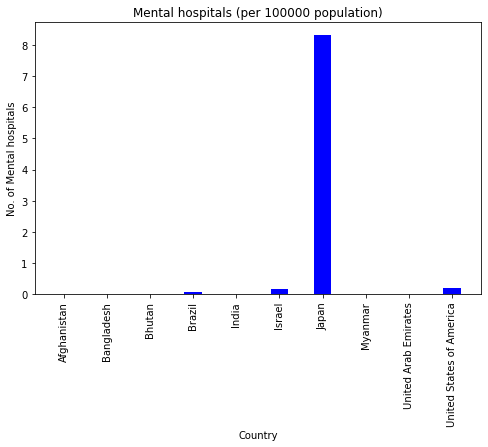

In [20]:
mental_hospitals = ds4[['Country', 'Mental_hospitals']].loc[(ds4.Country.isin(new_country_lst))]
mental_hospitals_data = list(mental_hospitals['Mental_hospitals'])
for data in mental_hospitals_data:
    if data == 'Data not avl':
        i = mental_hospitals_data.index(data)
        mental_hospitals_data[i] = 0

fig = plt.figure(figsize = (8, 5))
plt.bar(country_labels, mental_hospitals_data, color = 'blue', width = 0.4)
plt.xlabel("Country")
plt.xticks(rotation = 90)
plt.ylabel("No. of Mental hospitals")
plt.title("Mental hospitals (per 100000 population)")
plt.show()

Mental hospitals (per 100000 population) in different countries<br>
<b>Analysis:</b> Japan has the most Mental hospitals than other condidered countries

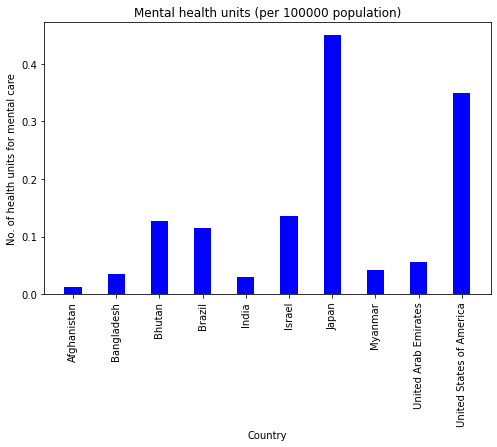

In [21]:
health_units = ds4[['Country', 'health_units']].loc[(ds4.Country.isin(new_country_lst))]
health_units_data = list(health_units['health_units'])
for data in health_units_data:
    if data == 'Data not avl':
        i = health_units_data.index(data)
        health_units_data[i] = 0
        
fig = plt.figure(figsize = (8, 5))
plt.bar(country_labels, health_units_data, color = 'blue', width = 0.4)
plt.xlabel("Country")
plt.xticks(rotation = 90)
plt.ylabel("No. of health units for mental care")
plt.title("Mental health units (per 100000 population)")
plt.show()

Mental health units (per 100000 population) in different countries<br>
<b>Analysis:</b> Japan has the most Mental health units than other condidered countries

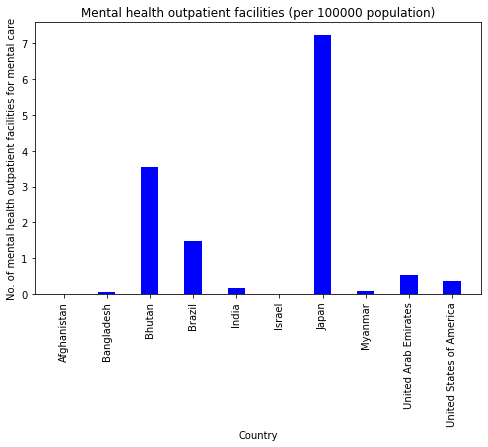

In [22]:
outpatient_facilities = ds4[['Country', 'outpatient_facilities']].loc[(ds4.Country.isin(new_country_lst))]
outpatient_facilities_data = list(outpatient_facilities['outpatient_facilities'])
for data in outpatient_facilities_data:
    if data == 'Data not avl':
        i = outpatient_facilities_data.index(data)
        outpatient_facilities_data[i] = 0

fig = plt.figure(figsize = (8, 5))
plt.bar(country_labels, outpatient_facilities_data, color = 'blue', width = 0.4)
plt.xlabel("Country")
plt.xticks(rotation = 90)
plt.ylabel("No. of mental health outpatient facilities for mental care")
plt.title("Mental health outpatient facilities (per 100000 population)")
plt.show()

Mental health outpatient facilities (per 100000 population) in different countries<br>
<b>Analysis:</b> Japan has the most Mental health outpatient facilities than other condidered countries

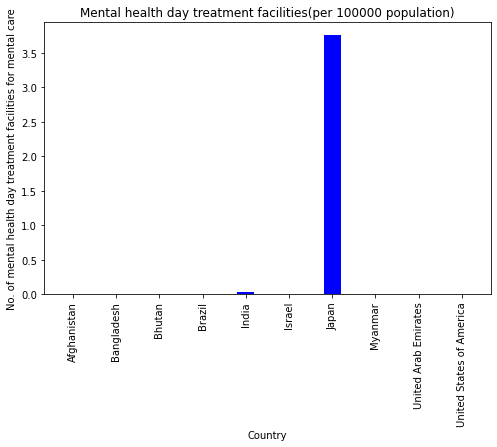

In [23]:
day_treatment = ds4[['Country', 'day_treatment']].loc[(ds4.Country.isin(new_country_lst))]
day_treatment_data = list(day_treatment['day_treatment'])
for data in day_treatment_data:
    if data == 'Data not avl':
        i = day_treatment_data.index(data)
        day_treatment_data[i] = 0
        
fig = plt.figure(figsize = (8, 5))
plt.bar(country_labels, day_treatment_data, color = 'blue', width = 0.4)
plt.xlabel("Country")
plt.xticks(rotation = 90)
plt.ylabel("No. of mental health day treatment facilities for mental care")
plt.title("Mental health day treatment facilities(per 100000 population)")
plt.show()

Mental health day treatment facilities (per 100000 population) in different countries<br>
<b>Analysis:</b> Japan has the most Mental health day treatment facilities than other condidered countries